In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Loading Data

In [2]:
X_train = pd.read_csv('/content/drive/Shared drives/M148Project/CSVs/new_train_data_with_avgs.csv')
y_train = X_train["Win_Percentage"]
X_train = X_train.drop(['Team', 'Year', 'Win_Percentage', 'Total_Rest_Days', 'Playoff'], axis = 1)
X_test = pd.read_csv('/content/drive/Shared drives/M148Project/CSVs/new_test_data_with_avgs.csv')
y_test = X_test["Win_Percentage"]
X_test = X_test.drop(['Team', 'Year', 'Win_Percentage', 'Total_Rest_Days', 'Playoff'], axis = 1)
X_test.head()

,Total_Distance_Traveled,Total_Points_For,Total_Points_Allowed,Total_Yards,Rush_Yards,Pass_Yards,Total_Opp_Yards,Opp_Rush_Yards,Opp_Pass_Yards,PF_Per_Game,...,Rush_Yds_Per_Game,Pass_YDs_Per_game,Opp_Yds_Per_Game,Opp_Rush_Yds_Per_game,Opp_Pass_Yds_Per_game,PD,Yds_DIff,PD_Per_Game,Yds_Diff_Per_Game,SOS
0,11029.604150,449,366,6352,2076,4276,5597,1952,3645,26.411765,...,122.117647,251.529412,329.235294,114.823529,214.411765,83,755,4.882353,44.411765,0.31
1,7582.250614,340,449,5499,1873,3626,5931,2016,3915,20.000000,...,110.176471,213.294118,348.882353,118.588235,230.294118,-109,-432,-6.411765,-25.411765,0.21
2,6208.864683,313,459,5164,1451,3713,6194,2242,3952,18.411765,...,85.352941,218.411765,364.352941,131.882353,232.470588,-146,-1030,-8.588235,-60.588235,0.10
3,6662.598089,365,386,5417,2718,2699,6156,2214,3942,21.470588,...,159.882353,158.764706,362.117647,130.235294,231.882353,-21,-739,-1.235294,-43.470588,-0.88
4,6496.672853,387,392,6440,2479,3961,6178,1436,4742,22.764706,...,145.823529,233.000000,363.411765,84.470588,278.941176,-5,262,-0.294118,15.411765,0.01


## Lasso Regression

In [3]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Create a LassoCV model
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=KFold(n_splits=5, shuffle=True, random_state=42))

# Fit the model
lasso_cv.fit(X_train, y_train)
print(f"Best alpha: {lasso_cv.alpha_}")

# Predict on test data
y_pred = lasso_cv.predict(X_test)

# Convert win percentage to number of wins, 17 games per sesaon
y_pred_actual = y_pred * 17
y_test_actual = y_test * 17

# Evaluate the model
mse = mean_squared_error(y_test_actual, y_pred_actual)
print(f"Mean Squared Error on Test Set: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Value on Test Set: {r2}")

# Access the coefficients (weights) of the features
coefficients = lasso_cv.coef_

# Print the weights for each column
for feature, weight in zip(X_train.columns, coefficients):
    print(f"{feature}: {weight}")

# You can also access the coefficients of the selected features
selected_features = X_train.columns[lasso_cv.coef_ != 0]
print("Selected Features:", selected_features)
print(len(selected_features), "Non-zero features")

# Assuming y_test_actual_wins and y_pred_actual_wins are NumPy arrays or lists
for actual, predicted in zip(y_test_actual, y_pred_actual):
    print(f"Actual: {actual}, Predicted: {predicted}, Difference: {abs(actual - predicted)}")

Best alpha: 0.01
Mean Squared Error on Test Set: 2.5455222189077578
R-squared Value on Test Set: 0.715919620798878
Total_Distance_Traveled: 8.807941377556842e-07
Total_Points_For: 0.001996389953443301
Total_Points_Allowed: -0.0019207878762158431
Total_Yards: -4.861587007943943e-05
Rush_Yards: 5.844184644782499e-06
Pass_Yards: -6.8673622307524085e-06
Total_Opp_Yards: 2.4012480414052306e-05
Opp_Rush_Yards: -3.851220381823307e-06
Opp_Pass_Yards: 1.245749480805797e-05
PF_Per_Game: 0.0
PA_Per_Game: -0.0
Yds_Per_game: -0.0
Rush_Yds_Per_Game: 0.0
Pass_YDs_Per_game: -0.0
Opp_Yds_Per_Game: 0.0
Opp_Rush_Yds_Per_game: -0.0
Opp_Pass_Yds_Per_game: 0.0
PD: 9.94758329255463e-05
Yds_DIff: 3.6741008475193584e-08
PD_Per_Game: 0.0
Yds_Diff_Per_Game: 0.0
SOS: -0.0
Selected Features: Index(['Total_Distance_Traveled', 'Total_Points_For', 'Total_Points_Allowed',
       'Total_Yards', 'Rush_Yards', 'Pass_Yards', 'Total_Opp_Yards',
       'Opp_Rush_Yards', 'Opp_Pass_Yards', 'PD', 'Yds_DIff'],
      dtype='obje

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02247828747275704, tolerance: 0.0006056653390522877
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14432664192191913, tolerance: 0.0006056653390522877
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017125315918422035, tolerance: 0.0005735191993464053
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:

## Ridge Regression

In [4]:
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Create a RidgeCV model
ridge_cv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=KFold(n_splits=5, shuffle=True, random_state=42))

# Fit the model
ridge_cv.fit(X_train, y_train)
print(f"Best alpha: {ridge_cv.alpha_}")

# Predict on test data
y_pred = ridge_cv.predict(X_test)

# Convert win percentage to number of wins in a 17 game sesaon
y_pred_actual = y_pred * 17
y_test_actual = y_test * 17

# Evaluate the model
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"Mean Squared Error on Test Set: {mse}")
print(f"R-squared Value on Test Set: {r2}")

# Access the coefficients (weights) of the features
coefficients = ridge_cv.coef_

# Print the weights for each column
for feature, weight in zip(X_train.columns, coefficients):
    print(f"{feature}: {weight}")

# You can also access the coefficients of the selected features
selected_features = X_train.columns
print("Selected Features:", selected_features)


Best alpha: 100.0
Mean Squared Error on Test Set: 2.559771325909778
R-squared Value on Test Set: 0.7143294199000825
Total_Distance_Traveled: 9.310721000882648e-07
Total_Points_For: 0.0025289511014984136
Total_Points_Allowed: -0.0024553703639556366
Total_Yards: -6.455453018637803e-05
Rush_Yards: -2.5823637597984463e-05
Pass_Yards: -3.8730892573183763e-05
Total_Opp_Yards: 5.0657576511872156e-05
Opp_Rush_Yards: 1.7221391569453362e-05
Opp_Pass_Yards: 3.34361850100151e-05
PF_Per_Game: 0.00015805944384345038
PA_Per_Game: -0.00015346064774723311
Yds_Per_game: -4.034658136522788e-06
Rush_Yds_Per_Game: -1.613977349716798e-06
Pass_YDs_Per_game: -2.420680785808639e-06
Opp_Yds_Per_Game: 3.1660985317913028e-06
Opp_Rush_Yds_Per_game: 1.0763369727792731e-06
Opp_Pass_Yds_Per_game: 2.0897615626531077e-06
PD: -0.00043958346864001005
Yds_DIff: 4.7655844155480086e-05
PD_Per_Game: -2.747396678984354e-05
Yds_Diff_Per_Game: 2.9784902596078506e-06
SOS: -0.0007398538882356905
Selected Features: Index(['Total_D

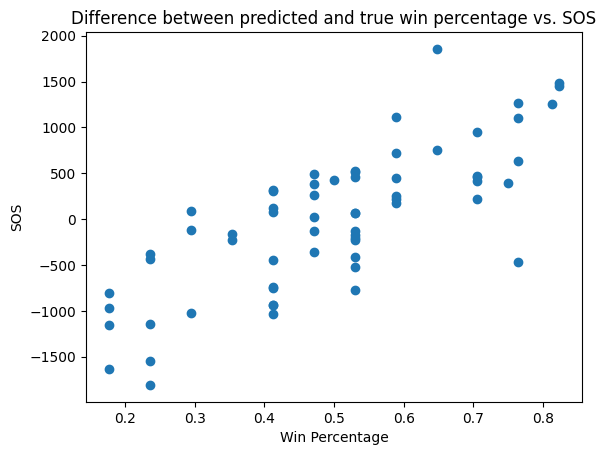

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have X_test, y_test, and y_pred
# X_test should contain a column named 'SOS'

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'SOS': y_test, 'Difference': X_test["Yds_DIff"]})

# Plot the data
plt.scatter(plot_data['SOS'], plot_data['Difference'])
plt.title('Difference between predicted and true win percentage vs. SOS')
plt.ylabel('SOS')
plt.xlabel('Win Percentage')
plt.show()


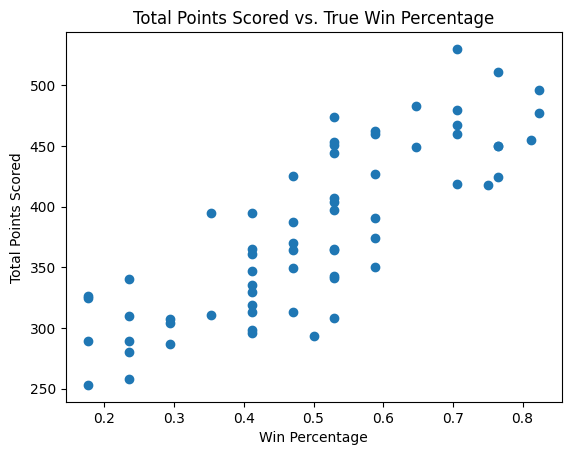

In [6]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'SOS': y_test, 'Difference': X_test["Total_Points_For"]})

# Plot the data
plt.scatter(plot_data['SOS'], plot_data['Difference'])
plt.title('Total Points Scored vs. True Win Percentage')
plt.ylabel('Total Points Scored')
plt.xlabel('Win Percentage')
plt.show()

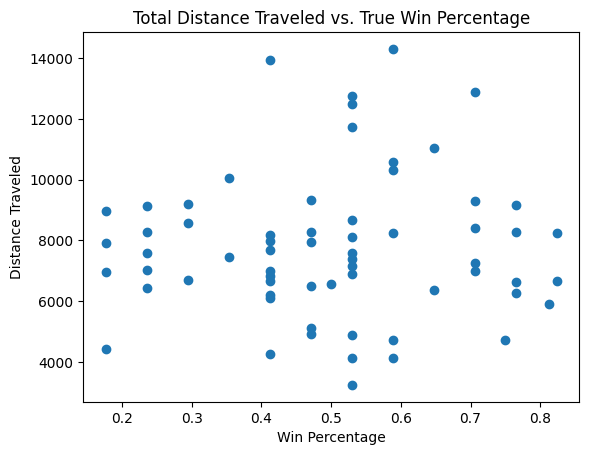

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have X_test, y_test, and y_pred
# X_test should contain a column named 'SOS'

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'SOS': y_test, 'Difference': X_test["Total_Distance_Traveled"]})

# Plot the data
plt.scatter(plot_data['SOS'], plot_data['Difference'])
plt.title('Total Distance Traveled vs. True Win Percentage')
plt.ylabel('Distance Traveled')
plt.xlabel('Win Percentage')
plt.show()